Импортируем библиотеки.

In [1]:
%pip install pandas #для работы с данными
%pip install numpy #для численных операций
%pip install seaborn #для визуализации данных
%pip install matplotlib #для создания графиков
%pip install scikit-learn 

import warnings
warnings.filterwarnings("ignore")  

import pandas as pd #для работы с таблицами данных
import numpy as np #для работы с массивами и числовыми операциями
import seaborn as sns #для более удобной и красивой визуализации данных

import matplotlib.pyplot as plt #для создания графиков
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot') #стиль графиков
from matplotlib.pyplot import figure #стандартный размер графиков
from sklearn import preprocessing

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Просматриваем загрузку данных

In [2]:
# чтение данных
df = pd.read_csv('квартиры10к.csv')
df.shape #кол-во колонок и строчек

(10582, 19)

In [3]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['floor' 'floors_count' 'rooms_count' 'total_meters' 'price' 'phone']


In [4]:
# отбор нечисловых(категориальных) колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['author' 'author_type' 'url' 'location' 'year_of_construction'
 'house_material_type' 'finish_type' 'living_meters' 'kitchen_meters'
 'district' 'street' 'house_number' 'underground']


Отсутствующие данные

Приведенная ниже карта демонстрирует пропущенные значения. По горизонтальной оси расположены признаки, по вертикальной – количество записей/строк.

<Axes: >

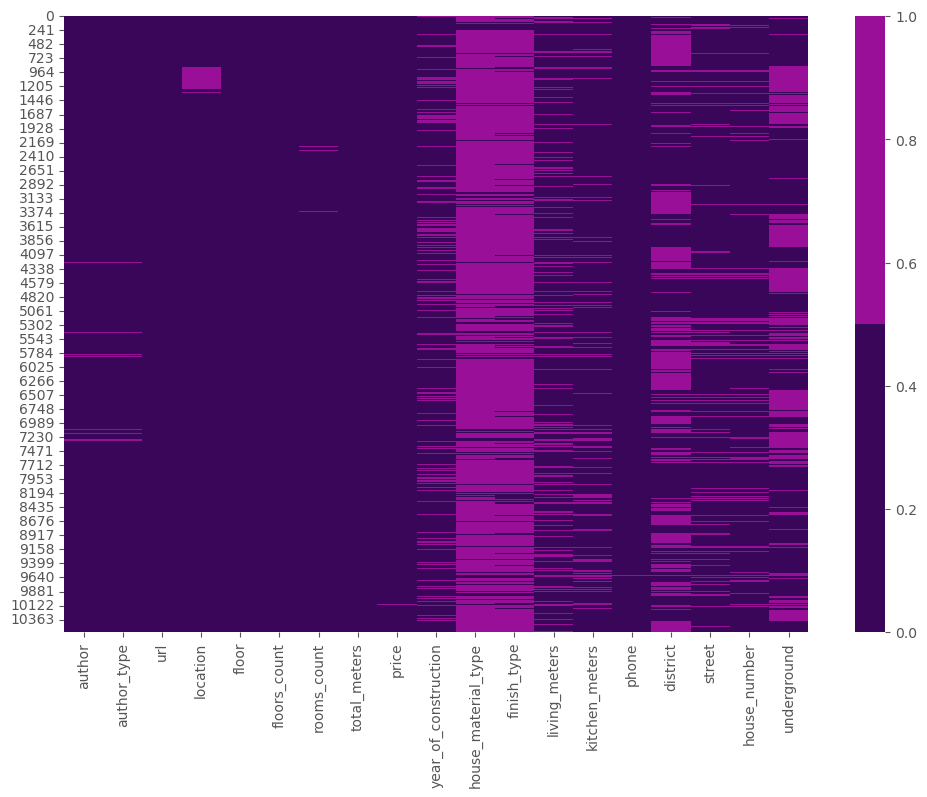

In [5]:
colours = ['#39065a', '#9a0f98']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

Процентный список пропущенных данных

In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())  #пропуски в % все что больше 35% надо удалять или придумывать как с ними работать если это важные колонки
    print('{} - {}%'.format(col, round(pct_missing*100))) # меньше % пропуски числовые колонки заполним медианой или модой

author - 2%
author_type - 2%
url - 0%
location - 4%
floor - 0%
floors_count - 0%
rooms_count - 1%
total_meters - 0%
price - 0%
year_of_construction - 21%
house_material_type - 88%
finish_type - 84%
living_meters - 23%
kitchen_meters - 15%
phone - 0%
district - 43%
street - 14%
house_number - 11%
underground - 37%


В процентном списке, построенном ранее, мы увидели, что признак house_material_type и finish_type имеют высокий процент недостающих значений. Мы можем полностью отказаться от этого признака:

In [7]:
# удаляю ненужные столбцы и с очень больним кол-вом пропусков 40%+
df.drop(['url', 'house_material_type', 'author', 'finish_type', 'phone', 'district'], axis=1, inplace=True) #axis=1 - cтолбцы, axis=0 -  строки

Дубликаты

In [8]:
df.drop_duplicates() #убираю дубликаты если есть

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,street,house_number,underground
0,real_estate_agent,Москва,5.0,7.0,1.0,34.6,9000000.0,1978,18 м²,8 м²,15-я Парковая,54,Щёлковская
1,real_estate_agent,Москва,14.0,45.0,1.0,41.3,12800000.0,2026,20 м²,11 м²,Перовское шоссе,NaN,Нижегородская
2,developer,Москва,10.0,12.0,1.0,34.4,19372498.0,2026,"11,8 м²","11,7 м²",Электрозаводская,60,Преображенская площадь
3,real_estate_agent,Москва,4.0,33.0,1.0,42.9,23600000.0,NaN,"22,9 м²",15 м²,Годовикова,11к2,Алексеевская
4,realtor,Москва,1.0,16.0,1.0,37.7,9450000.0,1982,NaN,NaN,Варшавское шоссе,142К2,Пражская
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10577,unknown,Балашиха,9.0,17.0,4.0,103.0,13500000.0,2015,"66,2 м²","12,5 м²",Брагина,1,Кучино
10578,real_estate_agent,Балашиха,18.0,22.0,4.0,100.0,12300000.0,NaN,NaN,10 м²,Летная,08,Салтыковская
10579,homeowner,Балашиха,8.0,12.0,4.0,74.0,10500000.0,1988,46 м²,10 м²,Твардовского,19,Перово
10580,real_estate_agent,Балашиха,3.0,5.0,4.0,61.2,7300000.0,1969,"44,3 м²","5,3 м²",Гагарина,6,Железнодорожная


In [9]:
# Заменяем текстовые значения на NaN
df['year_of_construction'] = pd.to_numeric(df['year_of_construction'], errors='coerce')

Пустые значения могли быть заполнены или Nan, или -1. Заменим их

In [10]:
df = df.replace(-1, np.nan)
df = df.replace(-1.0, np.nan)
df = df.replace("-1", np.nan)
df = df.replace("-1.0", np.nan)

In [11]:
 # Заменяем NaN на -1 для всех столбцов 
df['living_meters'].fillna(-1, inplace=True)
df['kitchen_meters'].fillna(-1, inplace=True)
df['year_of_construction'].fillna(-1, inplace=True)

In [12]:
df['kitchen_meters'] = df['kitchen_meters'].str.replace('\xa0м²', '').str.replace(',', '.').astype(float)
df['living_meters'] = df['living_meters'].str.replace('\xa0м²', '').str.replace(',', '.').astype(float)
#Удаляет последовательность символов \xa0м² из строки.
#Заменяет запятые на точки, что необходимо для корректного преобразования строковых значений в числовые форматы в Python.
#Конвертирует полученные значения в тип данных float, т.е. вещественные числа.

In [13]:
df['house_number'] = pd.to_numeric(df['house_number'], errors='coerce')
#Преобразует значения в числовой формат. Если значение невозможно конвертировать, оно будет заменено на пустое значение

 Заполнение пропусков:  
Далее код заполняет пропущенные значения в различных столбцах медианными значениями этих столбцов:

In [14]:
df['living_meters'] = df['living_meters'].fillna(df['living_meters'].median())
df['kitchen_meters'] = df['kitchen_meters'].fillna(df['kitchen_meters'].median())
df['year_of_construction'] = df['year_of_construction'].fillna(df['year_of_construction'].median())
df['rooms_count'] = df['rooms_count'].fillna(df['rooms_count'].median())
df['house_number'] = df['house_number'].fillna(df['house_number'].median())

In [15]:
df['house_number']

0        54.0
1        12.0
2        60.0
3        12.0
4        12.0
         ... 
10577     1.0
10578     8.0
10579    19.0
10580     6.0
10581     8.0
Name: house_number, Length: 10582, dtype: float64

In [16]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 2%
location - 4%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
living_meters - 0%
kitchen_meters - 0%
street - 14%
house_number - 0%
underground - 37%


In [17]:
# Удаляем строки, где все указанные колонки содержат NaN
df_cleaned = df.dropna(subset=['author_type', 'location', 'street', 'underground'])

for col in df_cleaned.columns:
    pct_missing = np.mean(df_cleaned[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


author_type - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
living_meters - 0%
kitchen_meters - 0%
street - 0%
house_number - 0%
underground - 0%


In [18]:
df_cleaned.to_csv('cleaned.csv', encoding='utf-8', index=False)

In [19]:
#готовый код который кодирует данные
def number_encode_features(init_df):
    result = init_df.copy() #копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() #для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) #применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df_cleaned) #Теперь encoded data содержит закодированные категориальные признаки
encoded_data.head() #проверяем

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,street,house_number,underground
0,3,24,5.0,7.0,1.0,34.6,9000000.0,1978.0,18.0,8.0,623,54.0,331
1,3,24,14.0,45.0,1.0,41.3,12800000.0,2026.0,20.0,11.0,1073,12.0,167
2,0,24,10.0,12.0,1.0,34.4,19372498.0,2026.0,11.8,11.7,1292,60.0,224
3,3,24,4.0,33.0,1.0,42.9,23600000.0,-1.0,22.9,15.0,171,12.0,4
4,4,24,1.0,16.0,1.0,37.7,9450000.0,1982.0,28.3,10.0,759,12.0,223


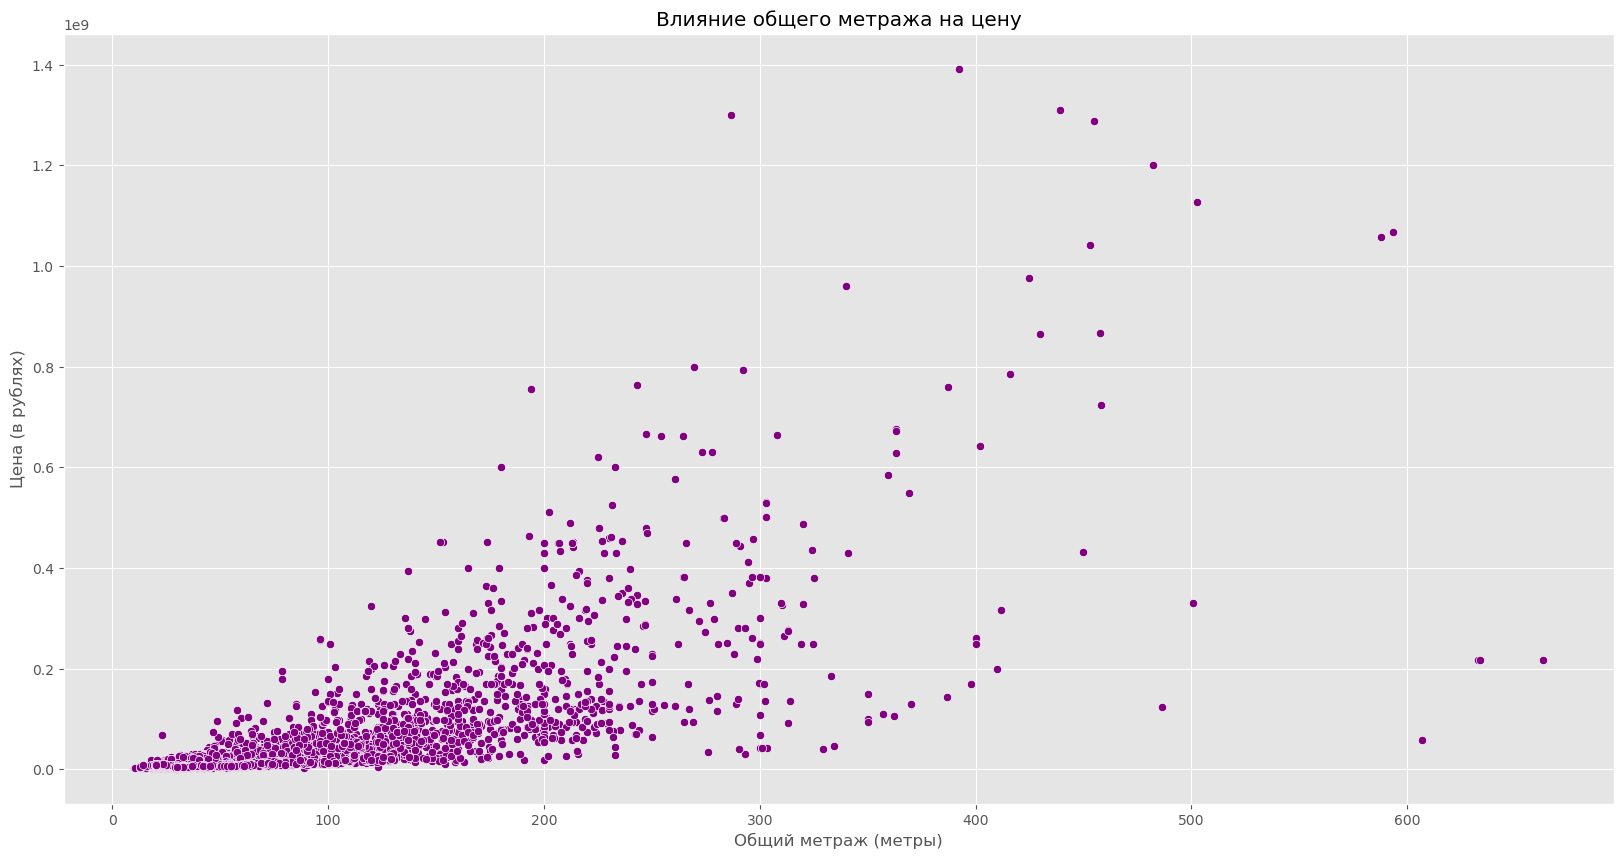

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.scatterplot(x='total_meters', y='price', data=encoded_data, color='purple')  # Изменяем цвет на фиолетовый
plt.title('Влияние общего метража на цену')
plt.xlabel('Общий метраж (метры)')  # Подпись для оси X
plt.ylabel('Цена (в рублях)')  # Подпись для оси Y
plt.show()

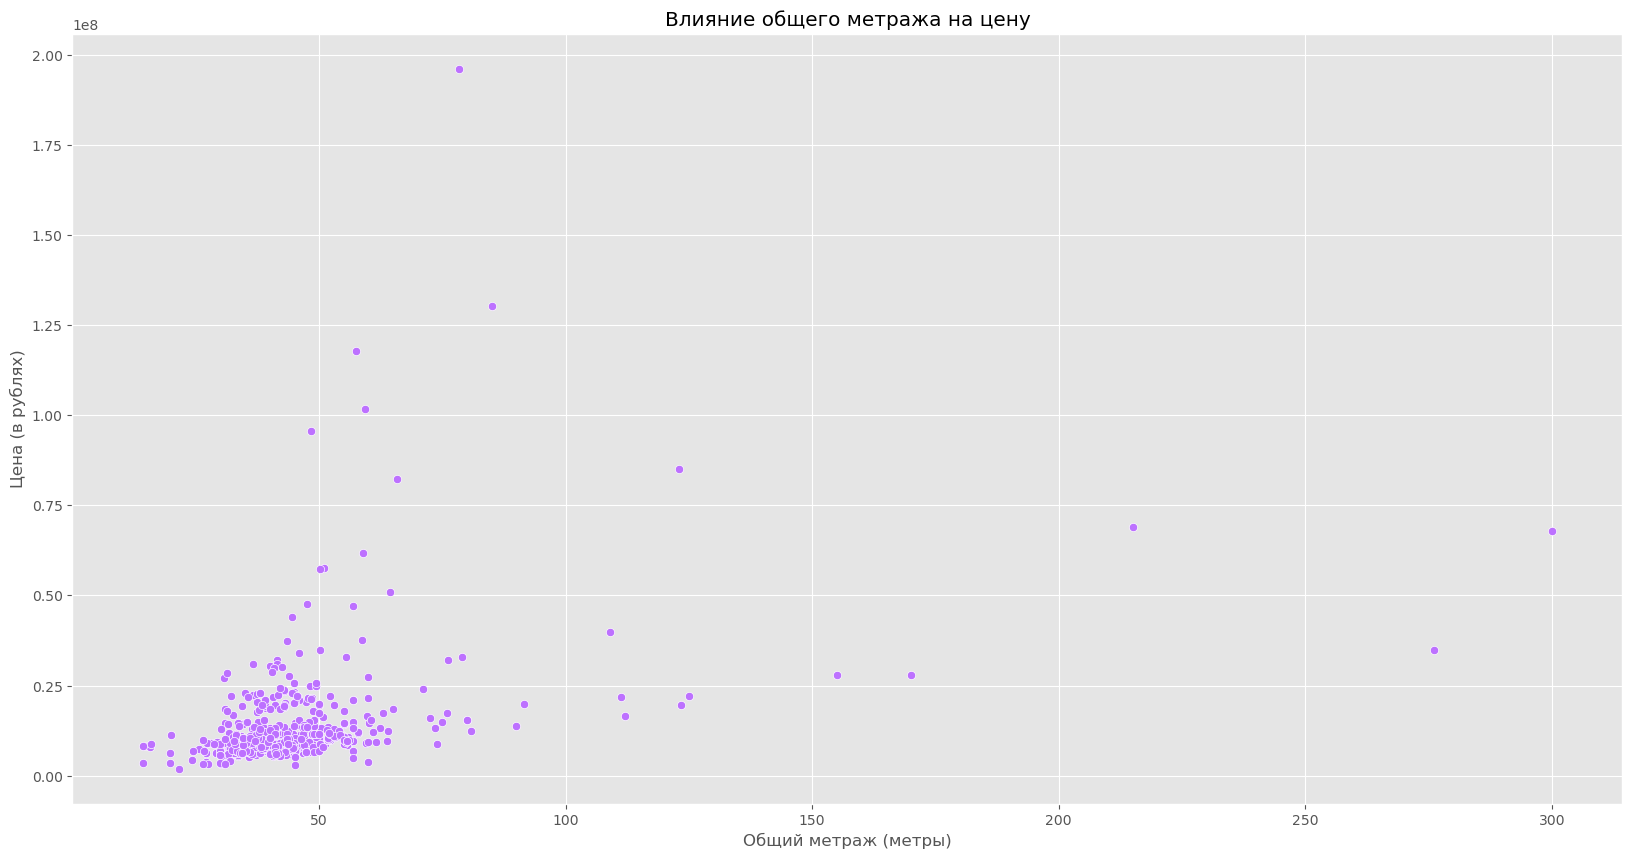

In [21]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='total_meters', y='price', data=encoded_data[:800], color='#bd71ff')  # Изменяем цвет на фиолетовый
plt.title('Влияние общего метража на цену')
plt.xlabel('Общий метраж (метры)')  # Подпись для оси X
plt.ylabel('Цена (в рублях)')  # Подпись для оси Y
plt.show()

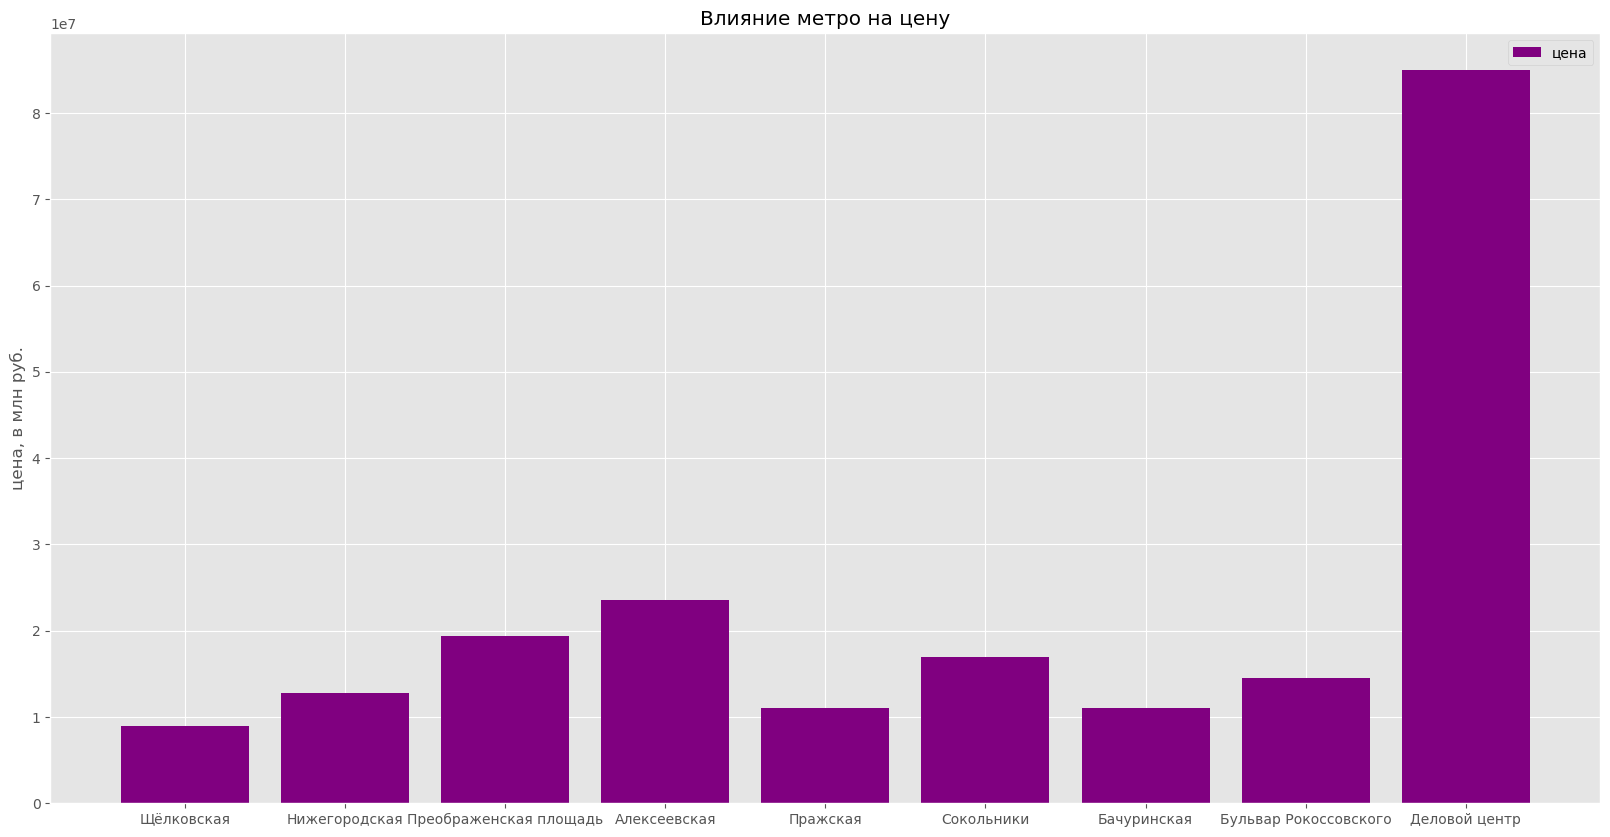

In [22]:


# Устанавливаем размер графика
plt.figure(figsize=(20, 10))

plt.bar(df_cleaned['underground'][:10], df_cleaned['price'][:10], label='цена',  color='purple')  # Параметр label позволяет задать название величины для легенды
plt.xlabel('')
plt.ylabel('цена, в млн руб.')
plt.title('Влияние метро на цену')
plt.legend()
plt.show()

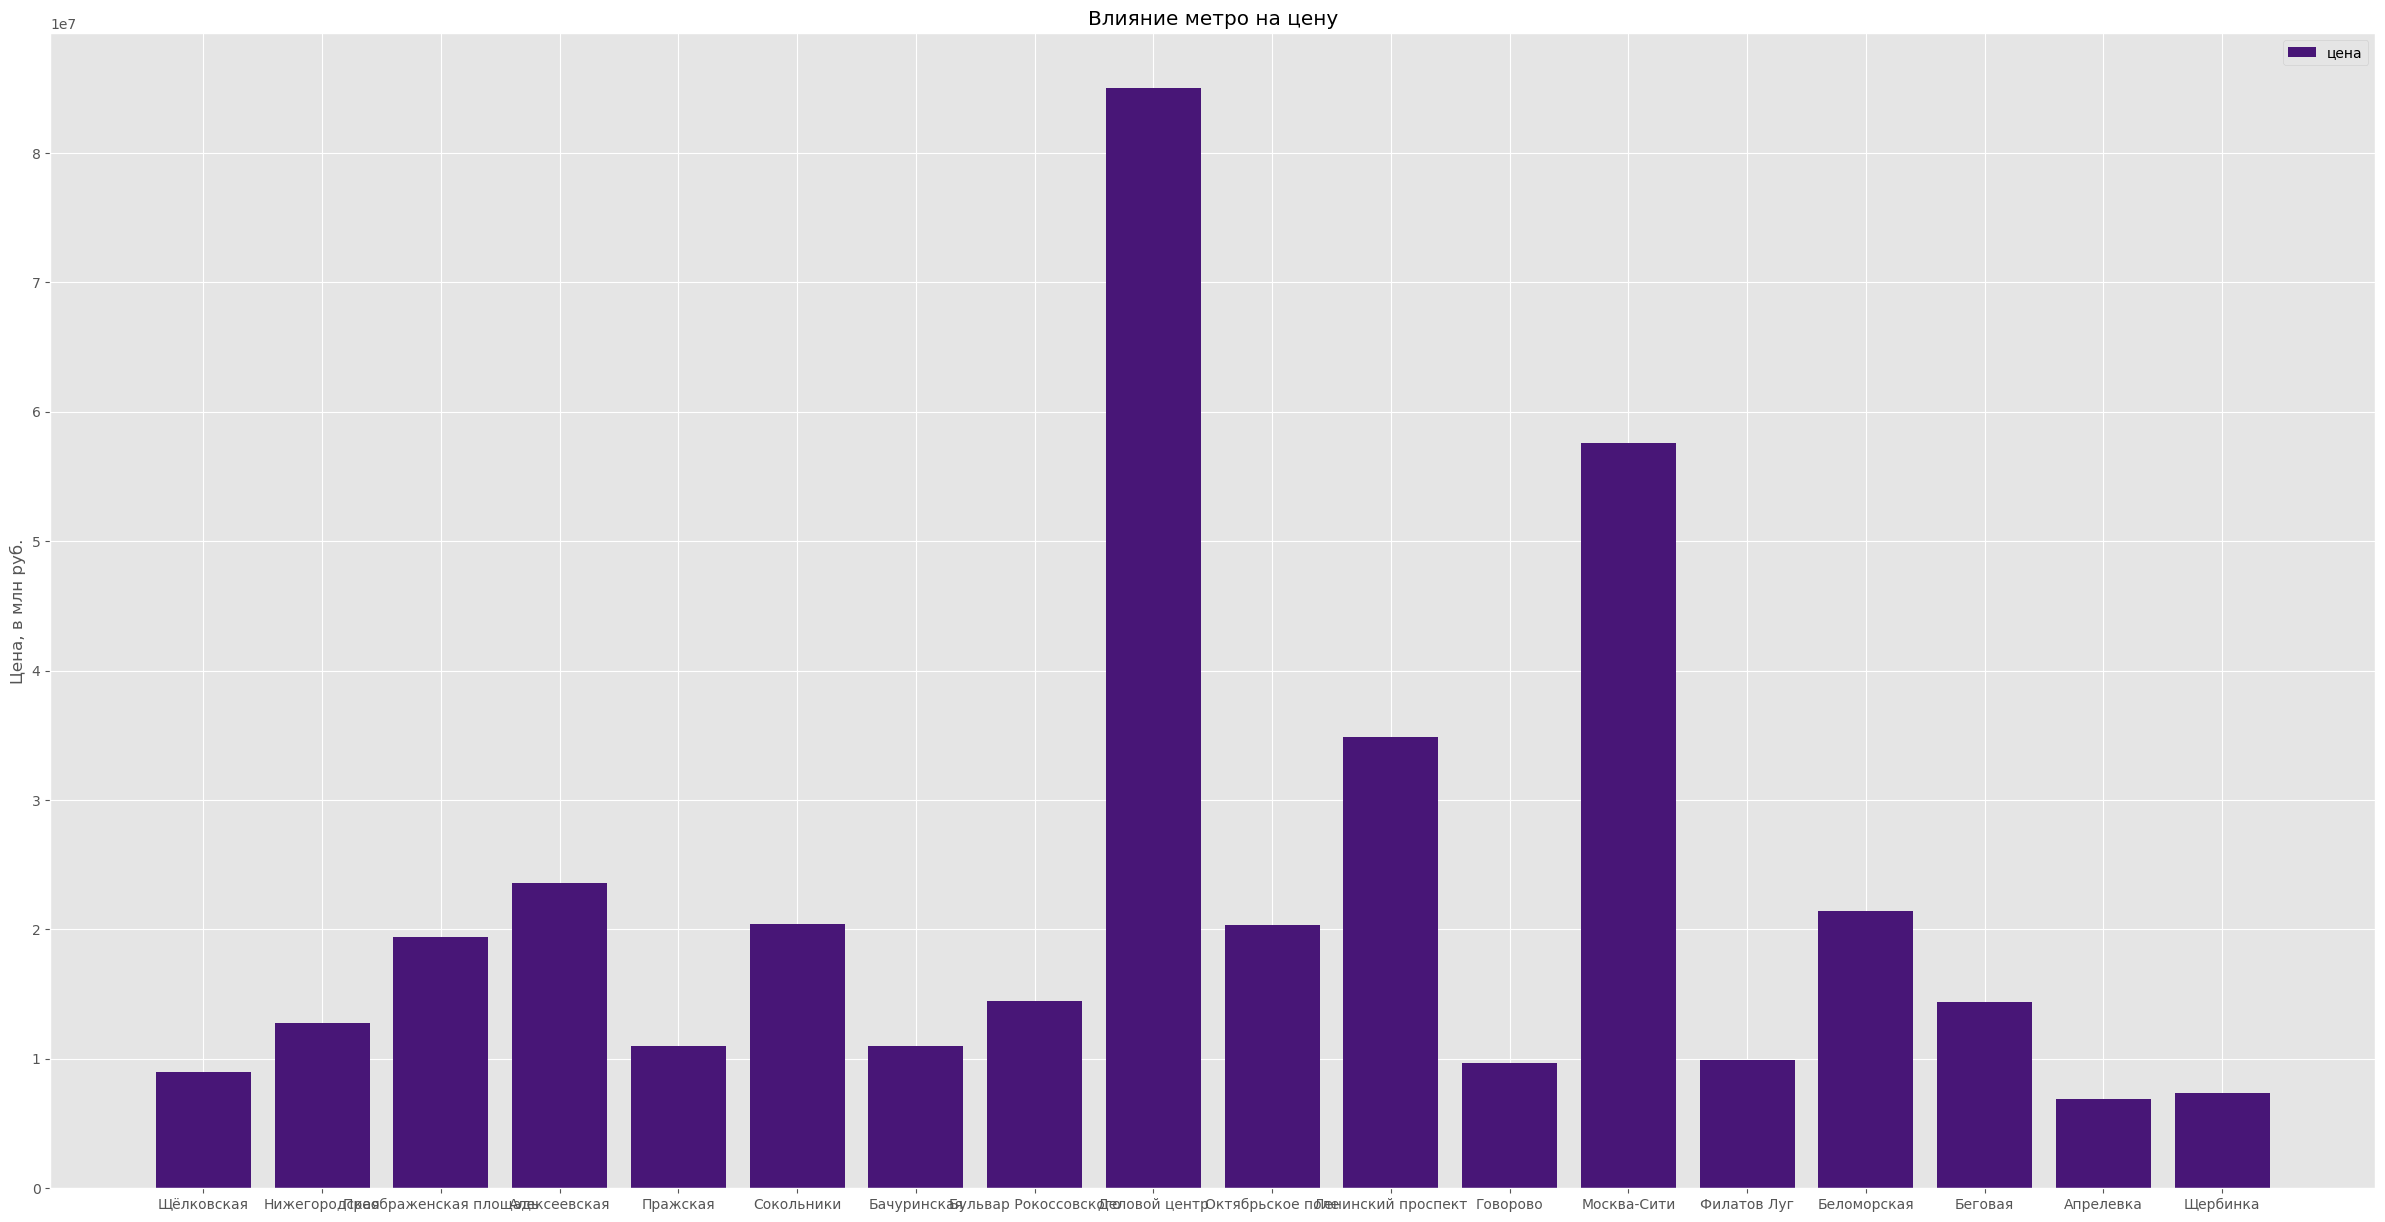

In [23]:
# Устанавливаем размер графика
plt.figure(figsize=(30, 15))

plt.bar(df_cleaned['underground'][:20], df_cleaned['price'][:20], label='цена',  color='#481677')  # Параметр label позволяет задать название величины для легенды
plt.xlabel('')
plt.ylabel('Цена, в млн руб.')
plt.title('Влияние метро на цену')
plt.legend()
plt.show()

       underground         price
321   Чистые пруды 1392320000.00
114  Кропоткинская 1309840000.00
19     Баррикадная 1289000000.00
265     Спортивная 1200000000.00
156    Москва-Сити 1067940000.00
145     Маяковская 1042360000.00
230     Пушкинская  976580000.00
275       Тверская  867754799.00
185    Октябрьская  864831599.00
221        Полянка  799000000.00


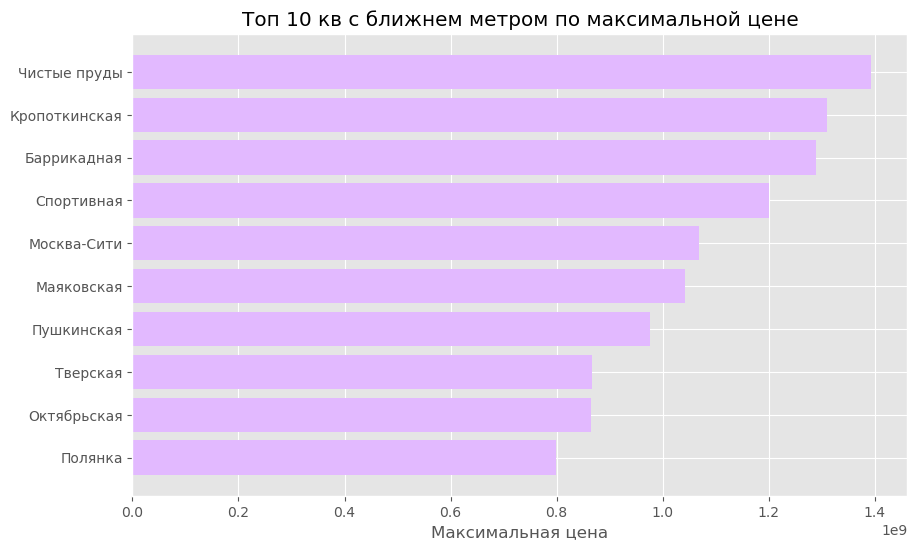

In [24]:
top_prices = df_cleaned.groupby('underground')['price'].max().reset_index()

# Сортировка по цене в порядке убывания
top_prices_sorted = top_prices.sort_values(by='price', ascending=False)

# Получение топ 10
top_n = top_prices_sorted.head(10)

# Формат отображения для чисел
pd.set_option('display.float_format', '{:.2f}'.format)

# Вывод топ 10 в консоль
print(top_n)


# Построение диаграммы
plt.figure(figsize=(10, 6))
plt.barh(top_n['underground'], top_n['price'], color='#e2b9ff')
plt.xlabel('Максимальная цена')
plt.title('Топ 10 кв с ближнем метром по максимальной цене')
plt.gca().invert_yaxis()
plt.show()

             underground      price
47               Вешняки 9000000.00
235            Раменское 7900000.00
14      Аэропорт Внуково 7800000.00
9              Аникеевка 7650000.00
281       Толстопальцево 7250000.00
68                 Десна 7200000.00
296      Улица Горчакова 6050000.00
312           Хлебниково 6000000.00
8             Андроновка 5700000.00
3    Александровский сад 1600000.00


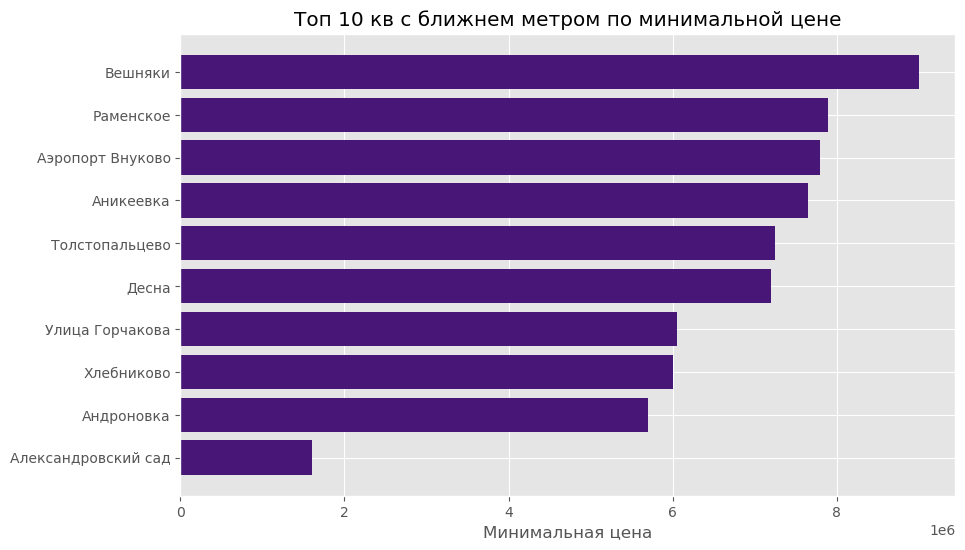

In [25]:
top_prices = df_cleaned.groupby('underground')['price'].max().reset_index()

# Сортировка по цене в порядке убывания
top_prices_sorted = top_prices.sort_values(by='price', ascending=False)

# Получение топ 10
top_n = top_prices_sorted.tail(10) #tail это смотрим с конца

# Формат отображения для чисел
pd.set_option('display.float_format', '{:.2f}'.format)

# Вывод топ 10 в консоль
print(top_n)


# Построение диаграммы
plt.figure(figsize=(10, 6))
plt.barh(top_n['underground'], top_n['price'], color='#481677')
plt.xlabel('Минимальная цена')
plt.title('Топ 10 кв с ближнем метром по минимальной цене')
plt.gca().invert_yaxis()
plt.show()

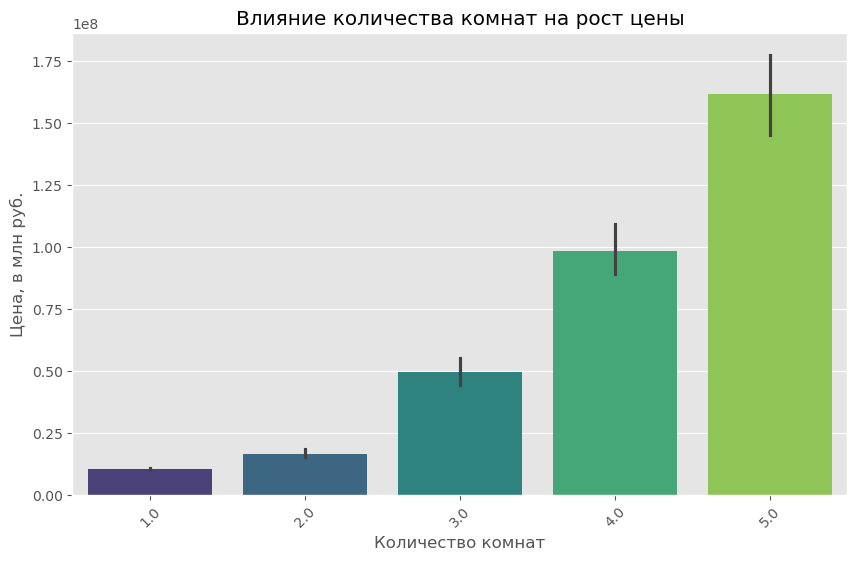

In [26]:

plt.figure(figsize=(10, 6))
sns.barplot(x='rooms_count', y='price', data=encoded_data, palette='viridis')
plt.title("Влияние количества комнат на рост цены")
plt.xlabel('Количество комнат')
plt.ylabel('Цена, в млн руб.')
plt.xticks(rotation=45)  
plt.show()



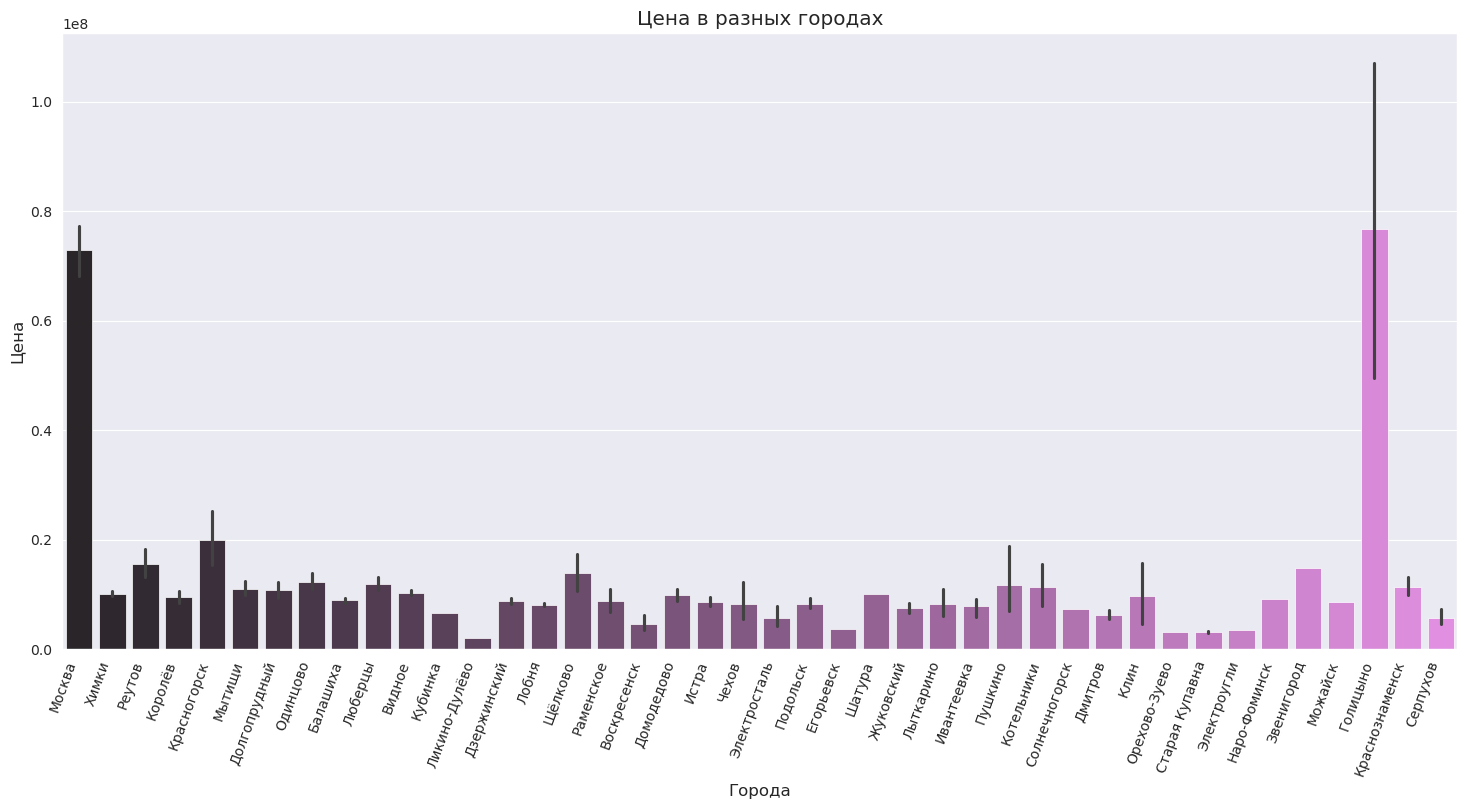

In [27]:
# График для цены во всех городах
sns.set_style("darkgrid")
info = pd.read_csv('cleaned.csv')
plt.figure(figsize=(18, 8))
sns.barplot(hue='location', legend=False, x='location', y='price', data=info, color='violet')
plt.title('Цена в разных городах')
plt.xlabel('Города')
plt.ylabel('Цена')
plt.xticks(rotation=70, ha='right')
plt.show()

<Axes: >

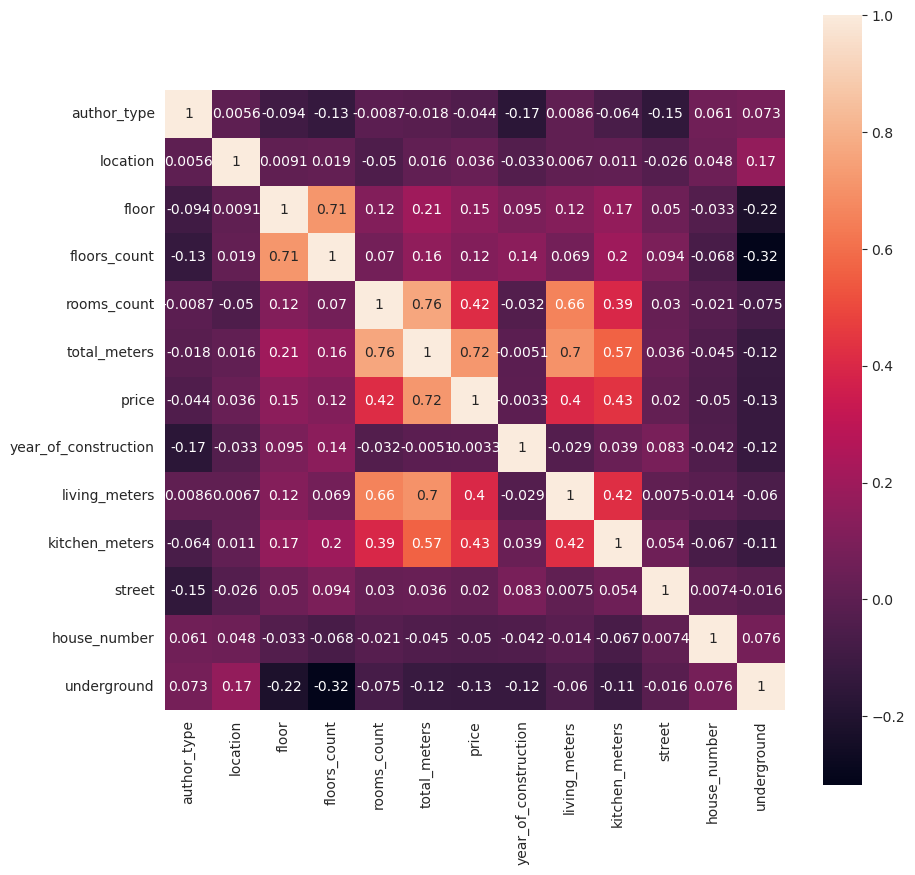

In [28]:
plt.subplots(figsize=(10,10))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True, annot=True)

С ценой сильно коррелирует общ кол-во метров это как раз было и видно на графиках выше